<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/Model_RF/RF_Model_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#load data target dan fitur (Excel)
df = pd.read_excel('/content/PM_ET0_hourly.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()


,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2023-06-01 00:00:02,2023,152,1,22.598,93.17,0.2,0.6,0.384822,0.971445,...,1276.211322,966.273503,-0.569386,690,0.542772,0.001954,0.000798,h,0.12,m
3,2023-06-01 01:00:02,2023,152,2,22.513,91.493,0.33,0.6,0.384822,0.971445,...,1271.080711,585.620305,-0.682089,690,1.254117,0.004515,0.001843,rc day,69.00,s/m
4,2023-06-01 02:00:02,2023,152,3,22.191,90.683,0.33,0.6,0.384822,0.971445,...,1265.895641,585.620305,-0.794135,690,1.326192,0.004774,0.001949,rc night,690.00,s/m
5,2023-06-01 03:00:02,2023,152,4,22.191,90.82,0.33,0.6,0.384822,0.971445,...,1261.355821,585.620305,-0.786578,690,1.298353,0.004674,0.001908,Latitude,-8.00,degrees
6,2023-06-01 04:00:02,2023,152,5,22.362,90.426,0.33,0.6,0.384822,0.971445,...,1256.939703,585.620305,-0.773292,690,1.380877,0.004971,0.002029,Longitude,115.00,degrees


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 2 to 4381
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4380 non-null   object 
 1   Year         4380 non-null   object 
 2   DOY          4380 non-null   object 
 3   Time         4380 non-null   object 
 4   T            4380 non-null   object 
 5   RH           4380 non-null   object 
 6   U            4380 non-null   object 
 7   Rs           4380 non-null   object 
 8   Dec          4380 non-null   object 
 9   dr           4380 non-null   object 
 10  Sc           4380 non-null   object 
 11  angh         4380 non-null   object 
 12  cos θ        4380 non-null   object 
 13  Rs pot       4380 non-null   object 
 14  TRA          4380 non-null   float64
 15  Rb           4380 non-null   object 
 16  es           4380 non-null   object 
 17  e            4380 non-null   object 
 18  VPD          4380 non-null   object 
 19  Rn    

In [4]:
target_variable = df['ET']
features_variable = df['RH']

In [5]:
# Split data untuk data fitur dan target
X = features_variable
y = target_variable

#Split data untuk train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
#Random Forest Model
model = RandomForestRegressor(n_estimators = 150, criterion='squared_error', max_depth =5)

In [7]:
#X_train_reshaped = np.reshape(X_train, (-1, 1))
#print(X_train.shape)
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

#Pelatihan model untuk data training
model.fit(X_train_reshaped, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [8]:
#Prediksi pada data training dan test
x_pred = model.predict(X_train_reshaped)
y_pred = model.predict(X_test_reshaped)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error : {mse: .2f}")
print(f"R-squared: {r2: .2f}")


Mean Squared Error :  0.02
R-squared:  0.62


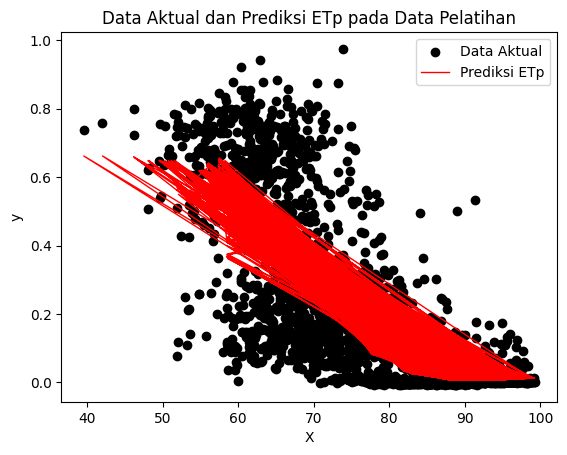

In [9]:
import matplotlib.pyplot as plt
# Plot data aktual dan prediksi pada data pelatihan
plt.scatter(X_train, y_train, color='black', label='Data Aktual')
plt.plot(X_train, x_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.title('Data Aktual dan Prediksi ETp pada Data Pelatihan')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


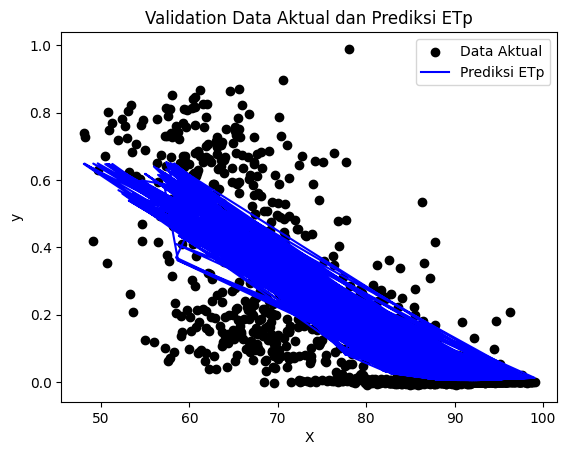

In [10]:
#Plot pada data test
plt.scatter(X_test, y_test, color = 'black', label = 'Data Aktual')
plt.plot(X_test, y_pred, color='blue', label='Prediksi ETp')
plt.title('Validation Data Aktual dan Prediksi ETp')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()